In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [5]:
from pandas_datareader import data, wb
import pandas_datareader as pdr

In [6]:
from datetime import datetime

from __future__ import division

In [11]:
biotechlist = ['EDIT','NTLA','SGMO','CRSP','BLUE']

In [12]:
end = datetime.now()

start = datetime(end.year - 1,end.month,end.day)

In [13]:
for stock in biotechlist:
    globals()[stock] = pdr.get_data_google(stock, start = start, end = end)

In [15]:
EDIT.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-07,15.00,15.10,14.00,14.06,459910
2016-10-10,13.90,14.63,13.85,14.51,188826
2016-10-11,14.39,14.50,13.88,14.05,182000
2016-10-12,14.00,14.00,13.05,13.14,316122
2016-10-13,13.15,13.90,13.15,13.77,338966


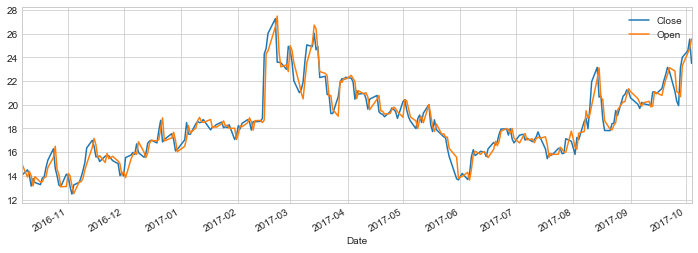

In [22]:
EDIT['Close'].plot(legend=True,figsize=(12,4))
EDIT['Open'].plot(legend=True,figsize=(12,4))

In [29]:
EDIT['Daily Return'] = EDIT['Close'].pct_change()
SGMO['Daily Return'] = SGMO['Close'].pct_change()

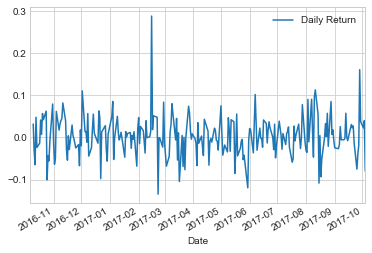

In [30]:
EDIT['Daily Return'].plot(legend=True)

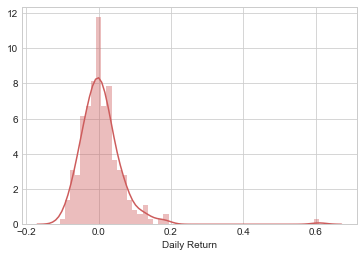

In [33]:
sns.distplot(SGMO['Daily Return'].dropna(),bins=50,color='indianred')

In [37]:
closing = pdr.get_data_google(biotechlist,start = start, end=end)['Close']

In [38]:
closing.head()

,BLUE,CRSP,EDIT,NTLA,SGMO
Date,,,,,
2016-10-07,69.67,NaN,14.06,15.10,4.33
2016-10-10,73.59,NaN,14.51,14.44,4.60
2016-10-11,70.03,NaN,14.05,13.11,4.50
2016-10-12,65.55,NaN,13.14,12.35,4.13
2016-10-13,65.24,NaN,13.77,13.57,4.05


In [39]:
changes = closing.pct_change()

In [43]:
changes = changes.dropna()

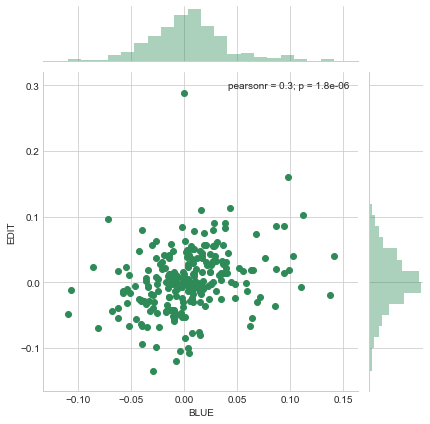

In [44]:
sns.jointplot('BLUE','EDIT',changes,kind='scatter',color='seagreen')

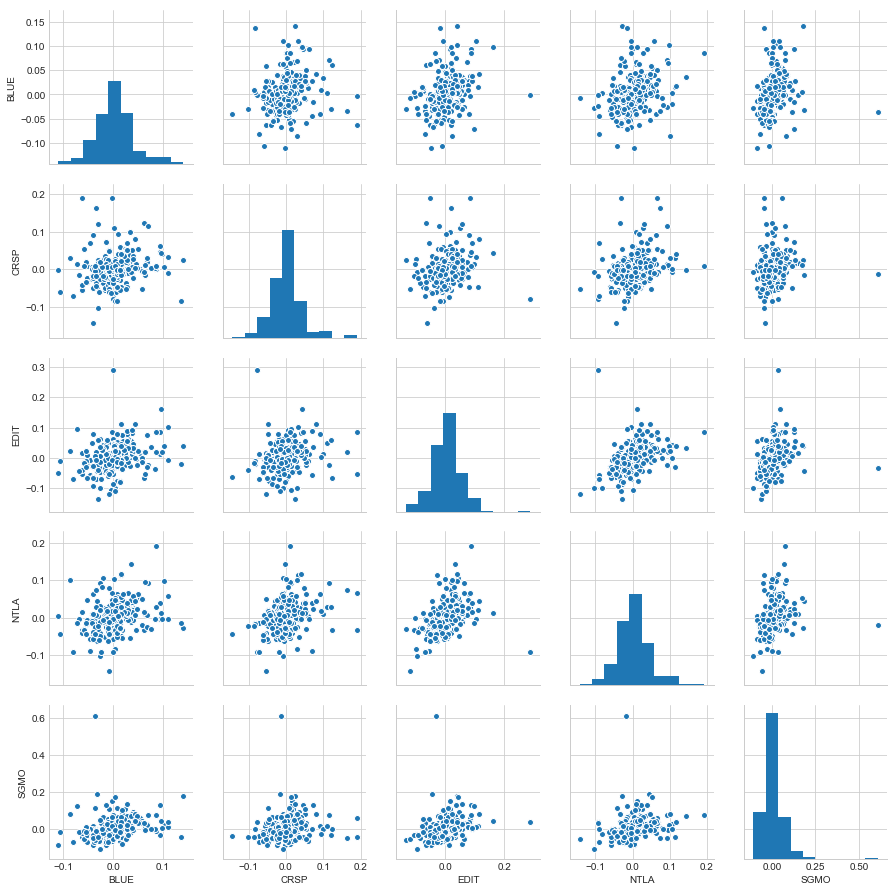

In [45]:
sns.pairplot(changes.dropna())

{'boxes': [<matplotlib.lines.Line2D at 0x11230aa90>],
 'caps': [<matplotlib.lines.Line2D at 0x112315ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11231ad68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11231a518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1123109e8>,
  <matplotlib.lines.Line2D at 0x112310ba8>]}

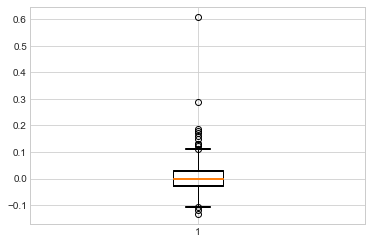

In [51]:
plt.boxplot(changes['SGMO'])
plt.boxplot(changes['EDIT'])

In [53]:
changes.dropna().corr()

,BLUE,CRSP,EDIT,NTLA,SGMO
BLUE,1.000000,0.166106,0.302069,0.282670,0.215012
CRSP,0.166106,1.000000,0.192751,0.307478,0.147237
EDIT,0.302069,0.192751,1.000000,0.410219,0.269859
NTLA,0.282670,0.307478,0.410219,1.000000,0.270156
SGMO,0.215012,0.147237,0.269859,0.270156,1.000000


In [61]:
changes.columns

Index(['BLUE', 'CRSP', 'EDIT', 'NTLA', 'SGMO'], dtype='object')

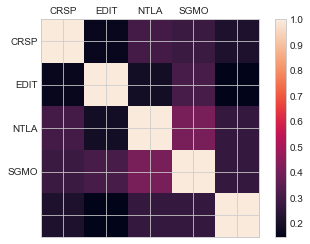

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

mydata = ax.matshow(changes.dropna().corr())

ax.set_xticklabels(['']+changes.columns)
ax.set_yticklabels(['']+changes.columns)
fig.colorbar(mydata)


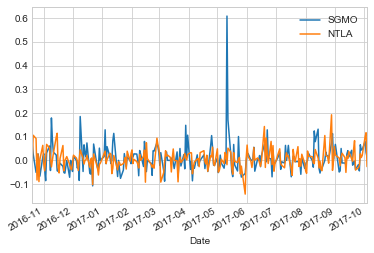

In [70]:
changes['SGMO'].plot(legend=True)
changes['NTLA'].plot(legend=True)

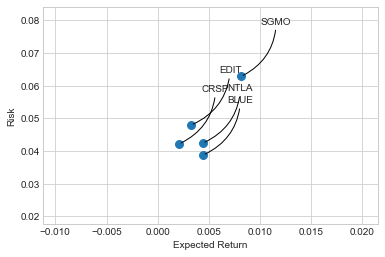

In [71]:
area = np.pi*20

plt.scatter(changes.mean(),changes.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords= 'offset points', ha='right', va='bottom',
    arrowprops = dict(arrowstyle= '-', connectionstyle='arc3,rad=-0.3'))